### Reliable Air Travel; Stratified Analysis of Flight Delay

#### Initial Steps¶
	•	Importing Libraries
	•	Reading the CSV file
	•	Finding missing and null values
	•	Removing Duplicate values
	•	Summary Statistics
	•	Formatting date columns

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv('USA flights delay data.csv')
df


/var/folders/xb/568nyh3s0sq25gg2t7pwzqn00000gn/T/ipykernel_4101/878566058.py:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('USA flights delay data.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
df.isna().sum()

Shape of dataset: (5819079, 31)

Missing values:
 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY       

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [44]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [46]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [50]:
# format the time columns to HH:MM  
def Convert_to_HHMM(time):
    if time == "24:00":
        return "00:00"
    elif pd.isna(time):
        return None
    time=int(time)
    hours = time // 100
    minutes = time % 100
    return f"{hours:02d}:{minutes:02d}"
df["SCHEDULED_DEPARTURE_HHMM"] = df["SCHEDULED_DEPARTURE"].apply(Convert_to_HHMM)
df["DEPARTURE_TIME_HHMM"] = df["DEPARTURE_TIME"].apply(Convert_to_HHMM)
df["SCHEDULED_ARRIVAL_HHMM"] = df["SCHEDULED_ARRIVAL"].apply(Convert_to_HHMM)
df["ARRIVAL_TIME_HHMM"] = df["ARRIVAL_TIME"].apply(Convert_to_HHMM)

In [52]:
# Create a date column by joining day, month, year
df['DATE'] = pd.to_datetime(df[['DAY','MONTH','YEAR']])

In [56]:
# Rearrange the columns
df = df[['YEAR', 'MONTH','DAY','DATE','DAY_OF_WEEK','FLIGHT_NUMBER','AIRLINE','ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE_HHMM','DEPARTURE_TIME_HHMM',
       'DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME','SCHEDULED_ARRIVAL_HHMM','ARRIVAL_TIME_HHMM',
        'AIR_TIME', 'DISTANCE','WHEELS_ON',
       'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
       ]]

In [62]:
# Check the distribution of the Cancellation reason  
df['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
Weather                48851
Airline                25262
National Air System    15749
Security                  22
Name: count, dtype: int64

In [64]:
# Map the cancellation reasons by their actual reasons
cancellation_reason = { 'A': 'Airline',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'}
 
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].replace(cancellation_reason)
df['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
Weather                48851
Airline                25262
National Air System    15749
Security                  22
Name: count, dtype: int64

#### Exploratory Data Analysis¶
	•	Flight statistics
	•	Airline statistics
	•	Route statistics
	•	Correlation matrix heatmap
	•	Boxplots to compare numeric features across flight delay

In [66]:
# Basic flight statistics

total_flights = len(df)

cancelled_flights = df['CANCELLED'].sum()

diverted_flights = df['DIVERTED'].sum()

on_time_flights = len(df[(df['DEPARTURE_DELAY'] <= 0) & (df['CANCELLED'] == 0)])



print("Flight Statistics:")

print (f"Total flights: {total_flights:,}")

print (f"Cancelled Flights: {cancelled_flights:,} ({(cancelled_flights/total_flights)*100:.2f})%")

print (f"Diverted Flights: {diverted_flights:,} ({(diverted_flights/total_flights)*100:.2f})%")

print (f"Ontime Flights: {on_time_flights:,} ({(on_time_flights/total_flights)*100:.2f})%")


                                                                                                                                                                                           

Flight Statistics:
Total flights: 5,819,079
Cancelled Flights: 89,884 (1.54)%
Diverted Flights: 15,187 (0.26)%
Ontime Flights: 3,606,117 (61.97)%


In [68]:
# Summary of Airline Statistics
airline_stats = df.groupby('AIRLINE').agg({'FLIGHT_NUMBER':'count','DEPARTURE_DELAY':'mean',
                                          'ARRIVAL_DELAY':'mean','CANCELLED':'sum',
                                          'DIVERTED':'sum'}).round(2)
airline_stats.columns = ['Total_Flights','Avg_Departure_Delay','Avg_Arrival_Delay',
                         'Cancelled_Flights','Diverted_Flights']
airline_stats = airline_stats.sort_values('Total_Flights',ascending=False)
airline_stats

,Total_Flights,Avg_Departure_Delay,Avg_Arrival_Delay,Cancelled_Flights,Diverted_Flights
AIRLINE,,,,,
WN,1261855,10.58,4.37,16043,3409
DL,875881,7.37,0.19,3824,1782
AA,725984,8.90,3.45,10919,2130
OO,588353,7.80,5.85,9960,1579
EV,571977,8.72,6.59,15231,1994
UA,515723,14.44,5.43,6573,1388
MQ,294632,10.13,6.46,15025,816
B6,267048,11.51,6.68,4276,730
US,198715,6.14,3.71,4067,425


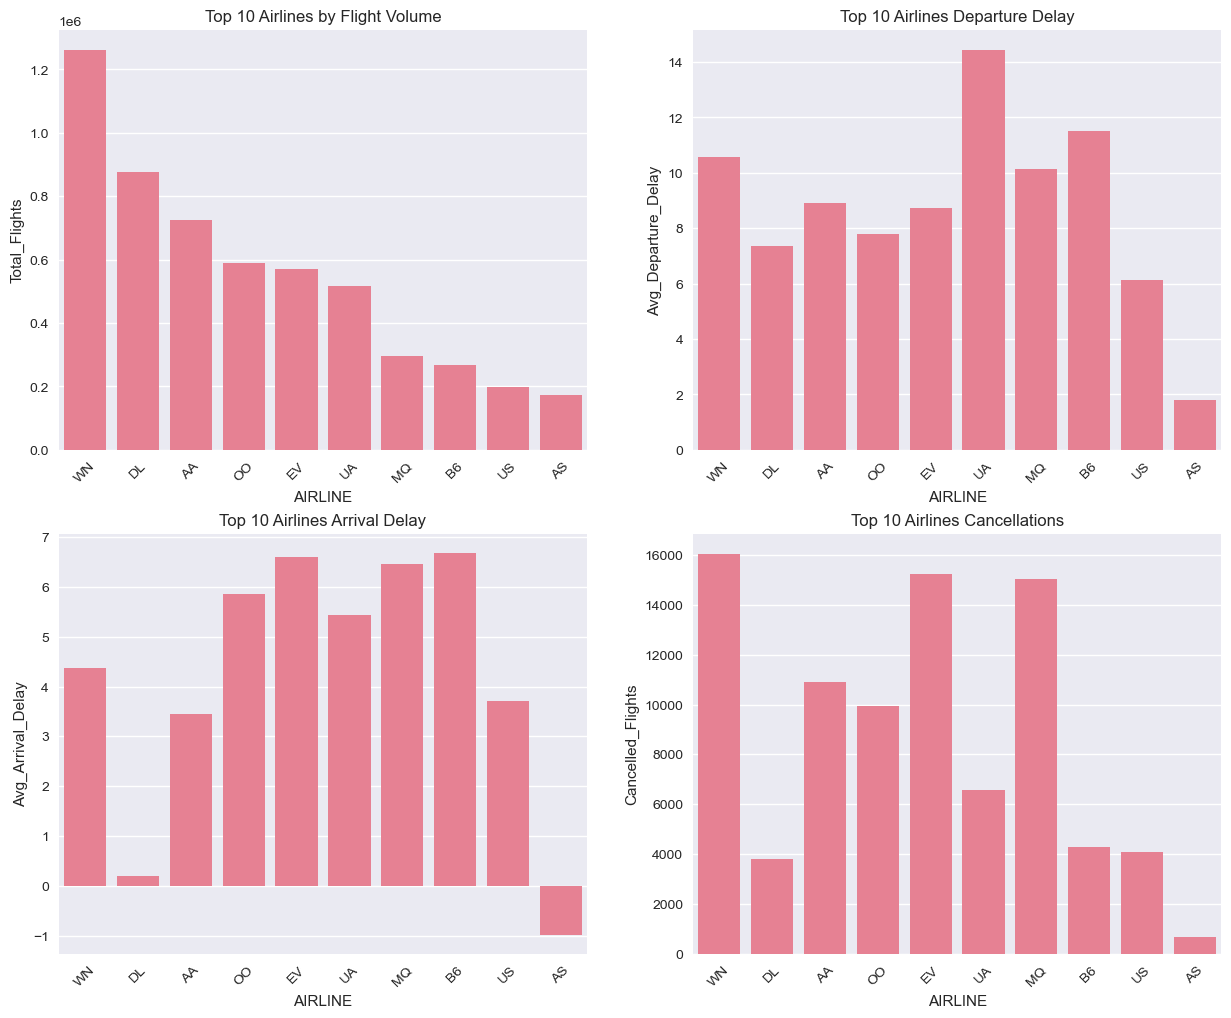

In [70]:
# Airline Stats Visualisation
fig, axes = plt.subplots(2,2, figsize=(15,12))

#Flight Volumns
top_airlines = airline_stats.head(10)
sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Total_Flights',ax = axes[0,0])
axes[0,0].set_title('Top 10 Airlines by Flight Volume')
axes[0,0].tick_params(axis='x',rotation=45)

# Average Departure Delay by Airlines
top_airlines = airline_stats.head(10)
sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Avg_Departure_Delay',ax = axes[0,1])
axes[0,1].set_title('Top 10 Airlines Departure Delay')
axes[0,1].tick_params(axis='x',rotation=45)

# Average Arrival Delay by Airlines
top_airlines = airline_stats.head(10)
sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Avg_Arrival_Delay',ax = axes[1,0])
axes[1,0].set_title('Top 10 Airlines Arrival Delay')
axes[1,0].tick_params(axis='x',rotation=45)

# Average Cancellation by Airlines
top_airlines = airline_stats.head(10)
sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Cancelled_Flights',ax = axes[1,1])
axes[1,1].set_title('Top 10 Airlines Cancellations')
axes[1,1].tick_params(axis='x',rotation=45)

plt.show()

#### Airline Statistics
- Top 3 airlines by flight volume - Southwest Airlines, Delta Airlines and American Airlines
- Top 3 airlines by departure delay - United Airlines, Southwest Airlines and JetBlue Airways
- Airlines with least departure and arrival delay - Alaska Airlines


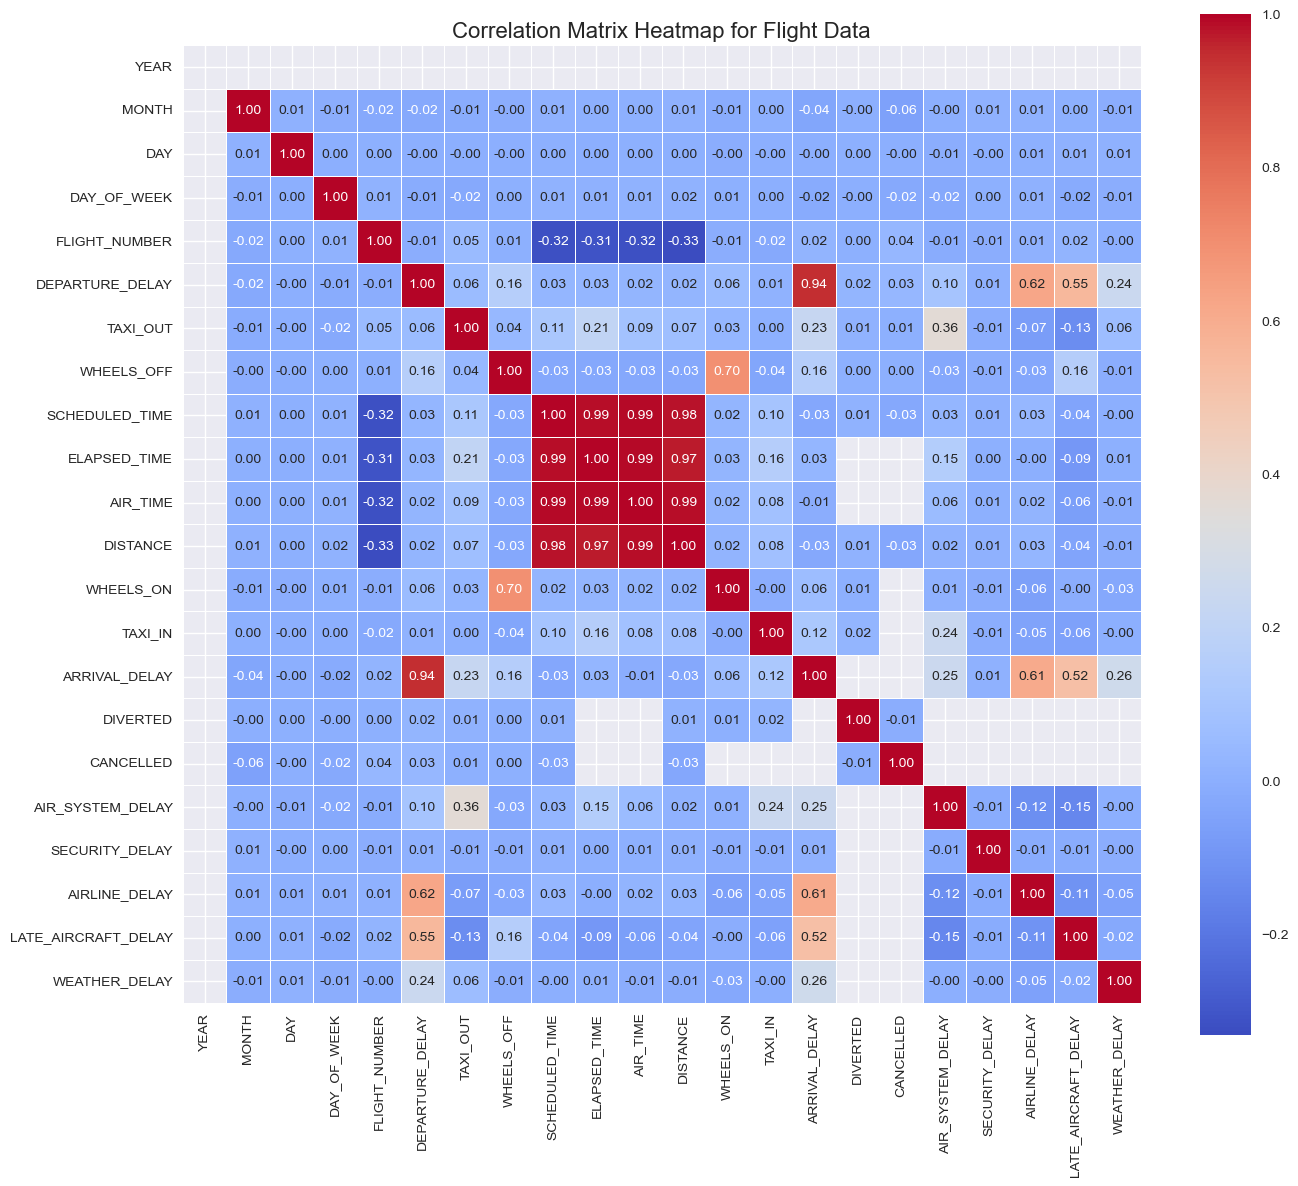

In [72]:
# Create correlation heatmap

# Drop non-numeric columns
non_numeric_cols = [
    'DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON'
]
numeric_df = df.drop(columns=non_numeric_cols, errors='ignore')
numeric_df = numeric_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Flight Data', fontsize=16)
plt.tight_layout()
plt.show()

In [74]:
# Summary Departure and Arrival delays by month
monthly_delay = df.groupby('MONTH',as_index=False).agg({'DEPARTURE_DELAY':'mean',
                                          'ARRIVAL_DELAY':'mean'}).round(2)
monthly_delay['Month_Name'] = monthly_delay['MONTH'].map({1:'Jan',2:'Feb',
                                        3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                                            10:'Oct',11:'Nov',12:'Dec'})
monthly_delay

,MONTH,DEPARTURE_DELAY,ARRIVAL_DELAY,Month_Name
0,1,9.76,5.81,Jan
1,2,11.89,8.32,Feb
2,3,9.66,4.92,Mar
3,4,7.72,3.16,Apr
4,5,9.45,4.49,May
5,6,13.99,9.60,Jun
6,7,11.39,6.43,Jul
7,8,9.93,4.61,Aug
8,9,4.82,-0.77,Sep
9,10,4.98,-0.78,Oct


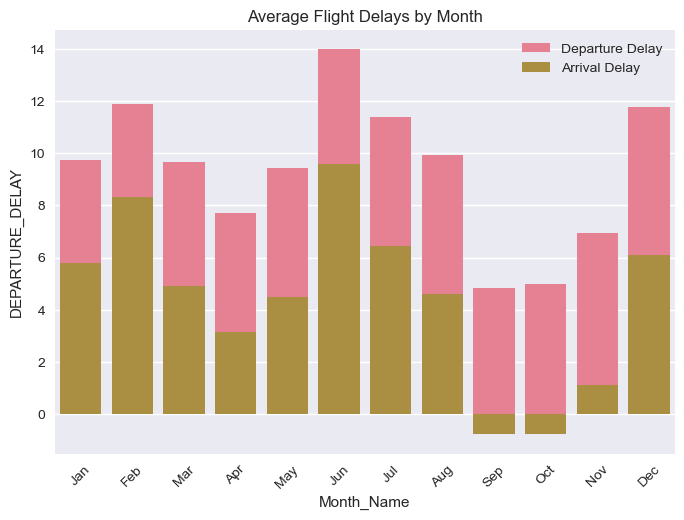

In [76]:
# Departure and Arrival Trends by monthplt.figure(figsize=(10,6))
sns.barplot(data=monthly_delay, x='Month_Name', y='DEPARTURE_DELAY', label='Departure Delay')
sns.barplot(data=monthly_delay, x='Month_Name', y='ARRIVAL_DELAY', label='Arrival Delay')
plt.title('Average Flight Delays by Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()


 Top 15 Routes: 
  Route  No of Flights
SFOLAX          13744
LAXSFO          13457
JFKLAX          12016
LAXJFK          12015
LASLAX           9715
LGAORD           9639
LAXLAS           9594
ORDLGA           9575
SFOJFK           8440
JFKSFO           8437
OGGHNL           8313
HNLOGG           8282
LAXORD           8256
ATLLGA           8234
LGAATL           8215


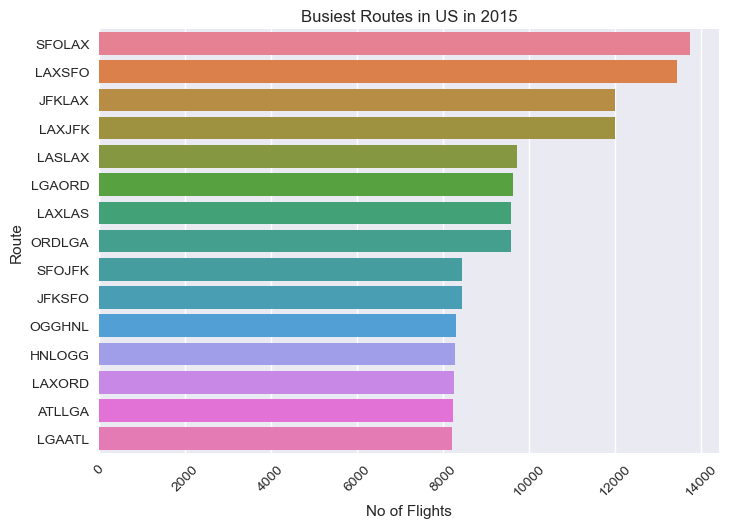

,Total_Flights,Avg_Departure_Delay,Avg_Arrival_Delay,Cancelled_Flights,Diverted_Flights
ROUTE,,,,,
SFOLAX,13744,12.60,11.44,338,6
LAXSFO,13457,14.06,10.74,342,6
JFKLAX,12016,7.97,-2.67,141,22
LAXJFK,12015,10.72,0.61,143,21
LASLAX,9715,11.33,11.97,63,1
LGAORD,9639,12.27,3.77,435,25
LAXLAS,9594,11.18,8.66,66,6
ORDLGA,9575,16.12,10.29,408,66
SFOJFK,8440,12.62,2.14,116,18


In [78]:
# Busiest airports

df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']

top_routes = df['ROUTE'].value_counts().head(15)

top_routes = top_routes.reset_index()

top_routes.columns = ['Route','No of Flights']

print(f"\n Top 15 Routes: \n {top_routes.to_string(index=False)}")
 
# Visualisation

sns.barplot(data=top_routes, x='No of Flights', y='Route',hue='Route')

plt.title("Busiest Routes in US in 2015")

plt.xticks(rotation=45)

plt.show()
 
# Summary of Route Statistics

route_stats = df.groupby('ROUTE').agg({'FLIGHT_NUMBER':'count','DEPARTURE_DELAY':'mean',

                                          'ARRIVAL_DELAY':'mean','CANCELLED':'sum',

                                          'DIVERTED':'sum'}).round(2)

route_stats.columns = ['Total_Flights','Avg_Departure_Delay','Avg_Arrival_Delay',

                         'Cancelled_Flights','Diverted_Flights']

route_stats = route_stats.sort_values('Total_Flights',ascending=False)

top_route_stats = route_stats.head(15)

top_route_stats
 

#### Route Statistics

- Top 3 busiest routes – San Francisco-Los Angeles, Los Angeles-San Francisco, NYC-Los Angeles


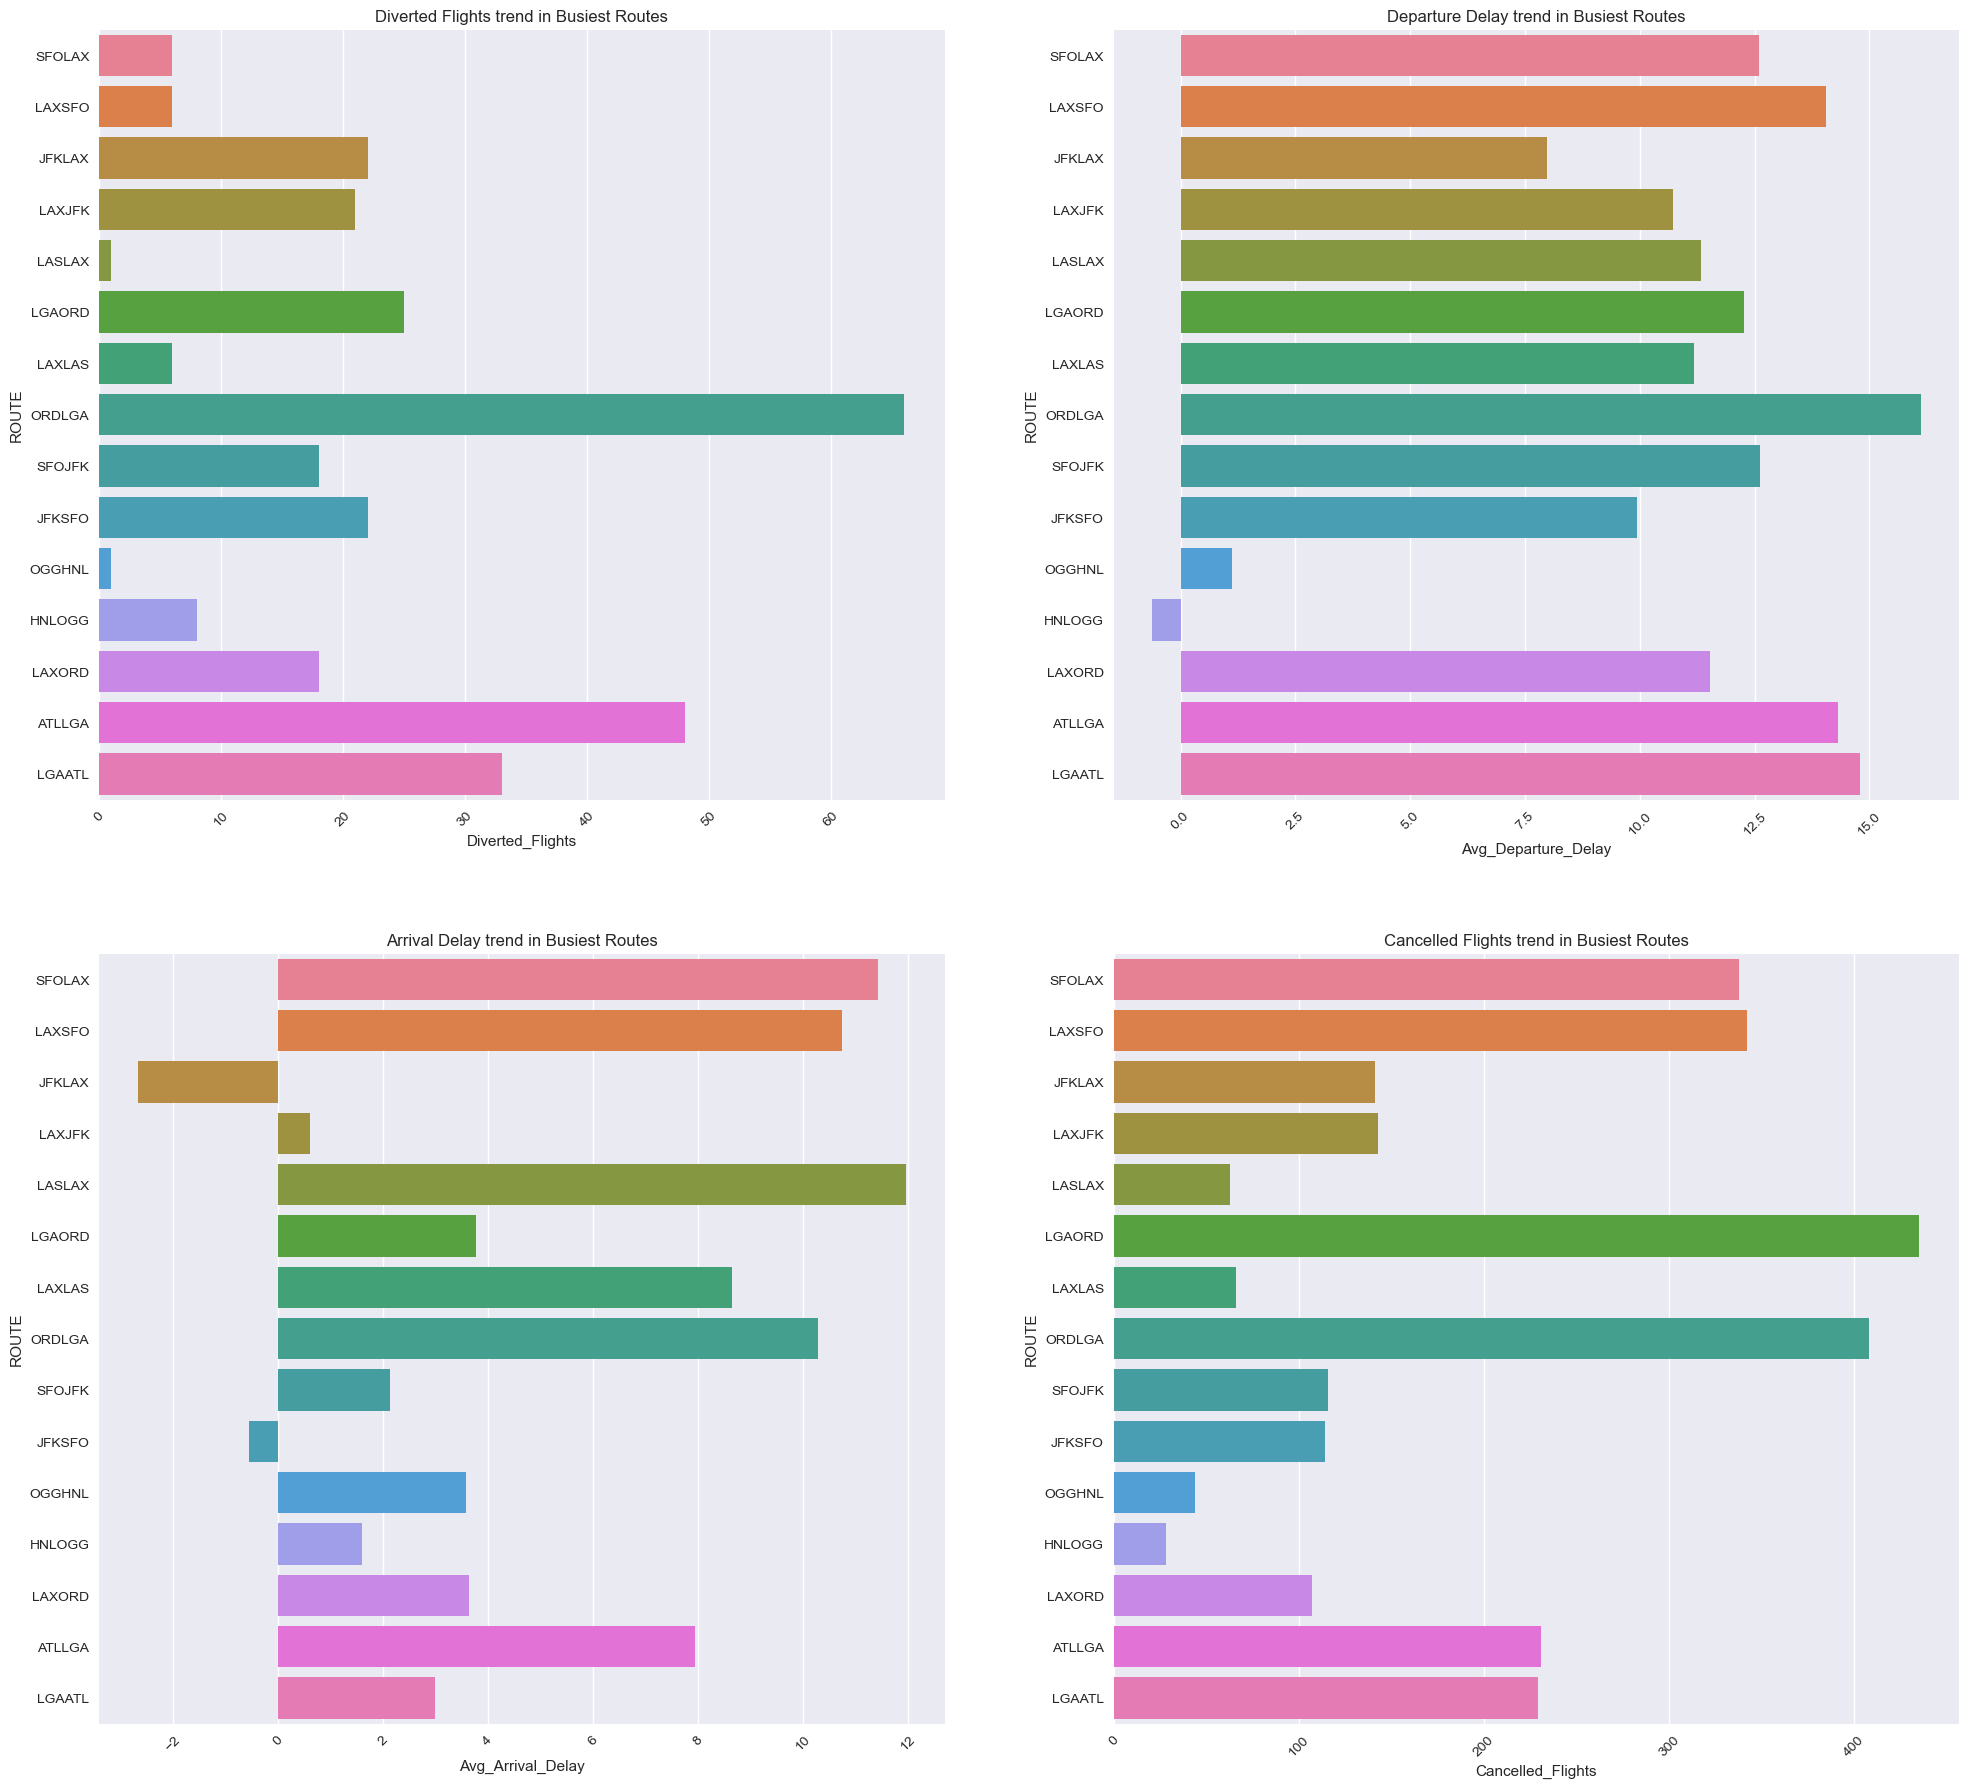

In [80]:
# Route Stats Visualisation

fig, axes = plt.subplots(2,2, figsize=(24,22))
 
# Diverted Flights

sns.barplot(data=top_route_stats ,y='ROUTE',x='Diverted_Flights', hue='ROUTE',ax = axes[0,0])

axes[0,0].set_title('Diverted Flights trend in Busiest Routes')

axes[0,0].tick_params(axis='x',rotation=45)
 
# Average Departure Delay by Route

sns.barplot(data=top_route_stats,y='ROUTE',x='Avg_Departure_Delay',hue='ROUTE',ax = axes[0,1])

axes[0,1].set_title('Departure Delay trend in Busiest Routes')

axes[0,1].tick_params(axis='x',rotation=45)
 
# Average Arrival Delay by Route

sns.barplot(data=top_route_stats,y='ROUTE',x='Avg_Arrival_Delay',hue='ROUTE',ax = axes[1,0])

axes[1,0].set_title('Arrival Delay trend in Busiest Routes')

axes[1,0].tick_params(axis='x',rotation=45)
 
# Average Cancellation by Route

sns.barplot(data=top_route_stats,y='ROUTE',x='Cancelled_Flights',hue='ROUTE',ax = axes[1,1])

axes[1,1].set_title('Cancelled Flights trend in Busiest Routes')

axes[1,1].tick_params(axis='x',rotation=45)
 
plt.show()
 

#### Route Statistics
- Routes with maximum departure delay - Chicago-La Guardia NYC and La Guardia NYC-Atlanta
- Routes with least departure delay - Maui-Honolulu, Hawaii

In [84]:
# Target variable creation 
df['DEPARTURE_DELAYED'] = (df['DEPARTURE_DELAY'] >= 15).astype(int)
df['ARRIVAL_DELAYED'] = (df['ARRIVAL_DELAY'] >= 15).astype(int)

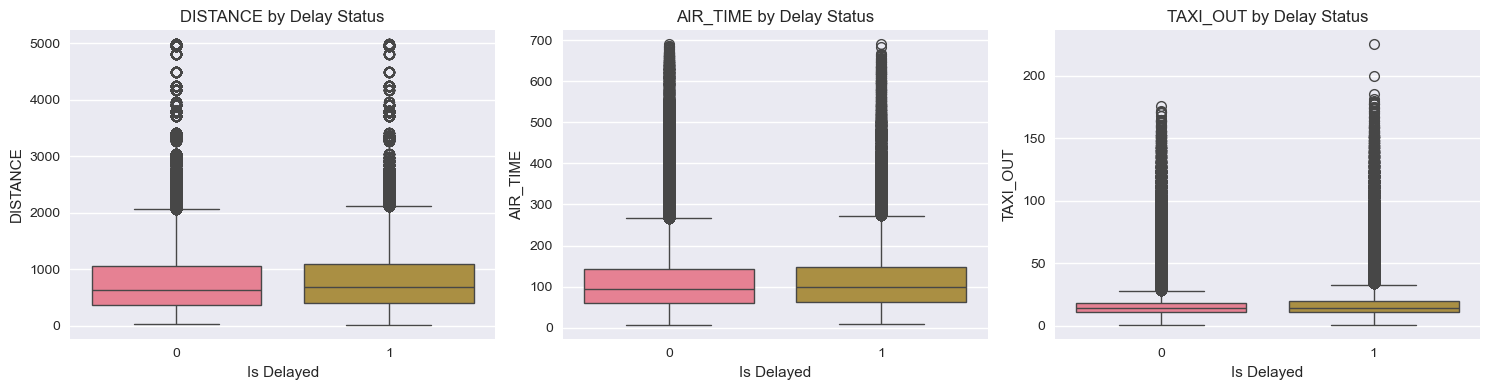

In [86]:
# Compare key numeric features across delayed and non-delayed flights
numeric_cols = ['DISTANCE', 'AIR_TIME', 'TAXI_OUT']
plt.figure(figsize=(15, 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='DEPARTURE_DELAYED', y=col, data=df, hue='DEPARTURE_DELAYED',legend=False)
    plt.title(f'{col} by Delay Status')
    plt.xlabel('Is Delayed')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

The above box plots show that delayed flights tend to have slightly longer taxi-out times. We will scale the outliers and assess thier importance using RFE during model training

#### Steps in feature engineering:
- Add delayed columns 1,0 based on 15 mins conditions
- clip large delays
##### Create features:
- IS_Weekend/weekday
- season
- Distance(Short haul, medium haul, long haul)
- Airport(Large,medium,small,non hub)

In [88]:
df['DEPARTURE_DELAYED'].value_counts(normalize=True)

DEPARTURE_DELAYED
0    0.818261
1    0.181739
Name: proportion, dtype: float64

In [90]:
df['ARRIVAL_DELAYED'].value_counts(normalize=True)

ARRIVAL_DELAYED
0    0.81725
1    0.18275
Name: proportion, dtype: float64

In [92]:
# Clip delay large values (-12 or +24 hr) delays
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].clip(lower=-720,upper=1440)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].clip(lower=-720,upper=1440)


In [96]:
# Convert to datetime and extract hour
df['SCHEDULED_HOUR'] = pd.to_datetime(df['SCHEDULED_DEPARTURE_HHMM'], format='%H:%M', errors='coerce').dt.hour

# Create TIME_OF_DAY
def hour_to_time_of_day(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['SCHEDULED_HOUR'].apply(hour_to_time_of_day)

In [98]:
# Create feature for flight is on weekday or weekend
df['IS_WEEKEND'] = df['DAY_OF_WEEK'].isin([6,7]).astype(int)

In [100]:
# Create feature for the season of the flight
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
df['SEASON'] = df['MONTH'].apply(get_season)

In [102]:
# Create feature for route distance categories
def distance_category(distance):
    if distance < 500:
        return 'Short-haul'
    elif 500 <= distance <= 1500:
        return 'Medium-haul'
    else:
        return 'Long-Haul'
df['DISTANCE_CATEGORY'] = df['DISTANCE'].apply(distance_category)

In [104]:
airports = pd.read_csv('airports.csv')

In [106]:
airports.rename(columns={'IATA_CODE':'ORIGIN_AIRPORT'},inplace=True)

In [108]:
# Merge the aiports data to the flights dataset
df = df.merge(airports[['ORIGIN_AIRPORT','LATITUDE',
       'LONGITUDE', 'Airport Type']],on='ORIGIN_AIRPORT',how='left')

#### Model Training (Baseline)
- Drop unecessary columns
- Apply RFE to identfy most important features
- train the model

In [110]:
# Drop unecessary columns for the model
cols_to_drop = [
    'FLIGHT_NUMBER','DATE','YEAR',
    'DEPARTURE_TIME_HHMM','DEPARTURE_DELAY',
    'WHEELS_OFF','ELAPSED_TIME','ARRIVAL_TIME_HHMM','SCHEDULED_TIME',
    'AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_DELAY',
    'DIVERTED','CANCELLED','CANCELLATION_REASON',
    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY',
    'ROUTE'
]
df_cleaned = df.drop(cols_to_drop,axis=1)
df_cleaned

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HHMM,TAXI_OUT,SCHEDULED_ARRIVAL_HHMM,DISTANCE,DEPARTURE_DELAYED,ARRIVAL_DELAYED,SCHEDULED_HOUR,TIME_OF_DAY,IS_WEEKEND,SEASON,DISTANCE_CATEGORY,LATITUDE,LONGITUDE,Airport Type
0,1,1,4,AS,ANC,SEA,00:05,21.0,04:30,1448,0,0,0,Night,0,Winter,Medium-haul,61.17432,-149.99619,Medium
1,1,1,4,AA,LAX,PBI,00:10,12.0,07:50,2330,0,0,0,Night,0,Winter,Long-Haul,33.94254,-118.40807,Large
2,1,1,4,US,SFO,CLT,00:20,16.0,08:06,2296,0,0,0,Night,0,Winter,Long-Haul,37.61900,-122.37484,Large
3,1,1,4,AA,LAX,MIA,00:20,15.0,08:05,2342,0,0,0,Night,0,Winter,Long-Haul,33.94254,-118.40807,Large
4,1,1,4,AS,SEA,ANC,00:25,11.0,03:20,1448,0,0,0,Night,0,Winter,Medium-haul,47.44898,-122.30931,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,LAX,BOS,23:59,22.0,08:19,2611,0,0,23,Night,0,Winter,Long-Haul,33.94254,-118.40807,Large
5819075,12,31,4,B6,JFK,PSE,23:59,17.0,04:46,1617,0,0,23,Night,0,Winter,Long-Haul,40.63975,-73.77893,Large
5819076,12,31,4,B6,JFK,SJU,23:59,17.0,04:40,1598,0,0,23,Night,0,Winter,Long-Haul,40.63975,-73.77893,Large
5819077,12,31,4,B6,MCO,SJU,23:59,10.0,03:40,1189,0,0,23,Night,0,Winter,Medium-haul,28.42889,-81.31603,Large


In [112]:
# Encode categorcal columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT','TIME_OF_DAY',
       'DESTINATION_AIRPORT','SEASON', 'DISTANCE_CATEGORY',
       'Airport Type']

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col + '_ENCODED'] = le.fit_transform(df_cleaned[col].astype(str))

print("Encoded columns created:")
print([col for col in df_cleaned.columns if '_ENCODED' in col])

Encoded columns created:
['AIRLINE_ENCODED', 'ORIGIN_AIRPORT_ENCODED', 'TIME_OF_DAY_ENCODED', 'DESTINATION_AIRPORT_ENCODED', 'SEASON_ENCODED', 'DISTANCE_CATEGORY_ENCODED', 'Airport Type_ENCODED']


In [114]:
# Prepare features on a Sample Dataset for RFE for top 12 values

numerical_features = ['MONTH', 'DAY', 'DAY_OF_WEEK','TAXI_OUT','DISTANCE',
        'SCHEDULED_HOUR','IS_WEEKEND','LATITUDE', 'LONGITUDE']

categorical_features = ['AIRLINE_ENCODED', 'ORIGIN_AIRPORT_ENCODED', 'TIME_OF_DAY_ENCODED', 
        'DESTINATION_AIRPORT_ENCODED', 'SEASON_ENCODED', 'DISTANCE_CATEGORY_ENCODED', 
        'Airport Type_ENCODED']

all_features = numerical_features + categorical_features

X = df_cleaned[all_features].fillna(0)
y = df_cleaned['DEPARTURE_DELAYED']

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X_tiny = X.sample(n=50000, random_state=42)
y_tiny = y.loc[X_tiny.index]

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced',n_jobs=-1)
rfe = RFE(estimator = rf, n_features_to_select=12,step=1)
rfe.fit(X_tiny,y_tiny)

selected_features = [feature for feature, selected in zip(all_features, rfe.support_) if selected]

print(f"Selected {len(selected_features)} features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

X_final = X[selected_features]
print(f"\nFinal Shape: {X_final.shape}")
    

Selected 12 features:
1. MONTH
2. DAY
3. DAY_OF_WEEK
4. TAXI_OUT
5. DISTANCE
6. SCHEDULED_HOUR
7. LATITUDE
8. LONGITUDE
9. AIRLINE_ENCODED
10. ORIGIN_AIRPORT_ENCODED
11. TIME_OF_DAY_ENCODED
12. DESTINATION_AIRPORT_ENCODED

Final Shape: (5819079, 12)


In [116]:
# Spilt the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y,
                        test_size = 0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (4655263, 12)
Test set: (1163816, 12)


### Random Forest
Esemble Methods that built multiple independence

In [82]:
# Train the first model (Random Forest)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=100,max_depth=15,
    min_samples_split = 100,
    min_samples_leaf = 50,
    class_weight = 'balanced',
    random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['on_time','Delayed']))



 Random Forest Performance
Accuracy: 0.644

Classification Report:
              precision    recall  f1-score   support

     on_time       0.90      0.64      0.75    952305
     Delayed       0.29      0.67      0.41    211511

    accuracy                           0.64   1163816
   macro avg       0.60      0.66      0.58   1163816
weighted avg       0.79      0.64      0.68   1163816



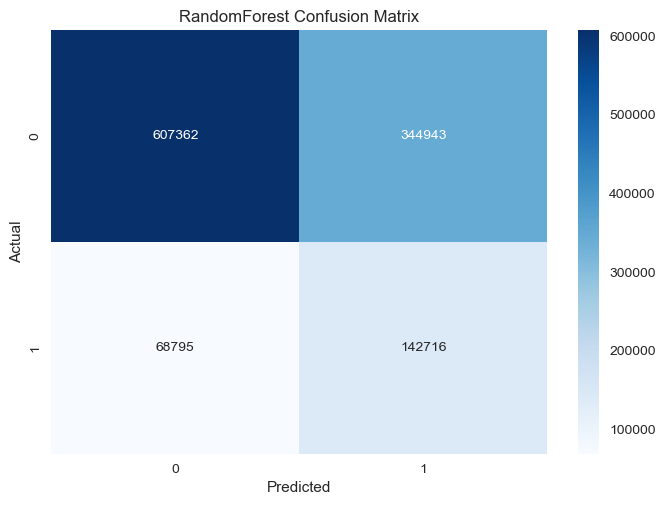

In [84]:
# Create a heatmap for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RandomForest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### LightGBM

Esemble Methods where each tree are correct.


[LightGBM] [Info] Number of positive: 846043, number of negative: 3809220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 4655263, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181739 -> initscore=-1.504610
[LightGBM] [Info] Start training from score -1.504610

 LightGBM Performance
✅ Accuracy: 0.8223035256432288

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90    952305
           1       0.65      0.05      0.09    211511

    accuracy                           0.82   1163816
   macro avg       0.74      0.52      0.50   1163816
weighted avg       0.79      0.82      0.75   1163816



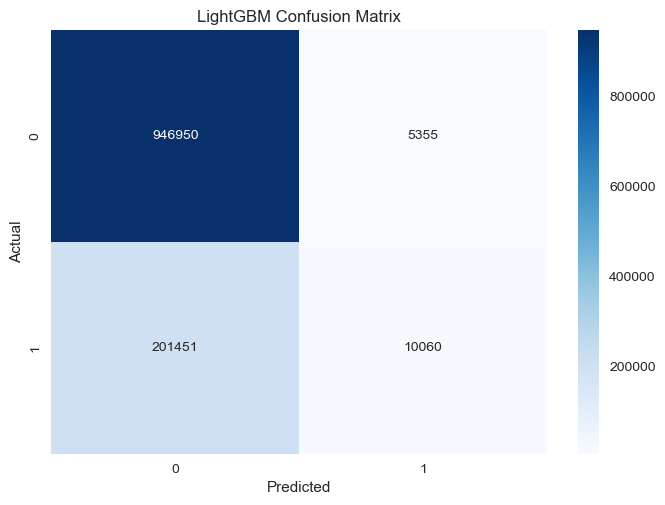

In [118]:
# Train the second model LightGBM classifier (lightgbm)
import lightgbm as lgb


lgbm_model = lgb.LGBMClassifier(random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

print("\n LightGBM Performance")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Model optimization
- Apply Randomizedsearch CV for Hyperparameter Tuning on dataset sample and then train on full model

In [120]:
# Create a smaller tuning sample for faster processing due to large dataset
df_tune = df_cleaned.sample(200000, random_state=42)

X_small = df_tune[all_features]
y_small = df_tune['DEPARTURE_DELAYED']                                                                                                                          

In [122]:
# Apply RandomizedSearchCV on tuned dataset
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, -1],
    'num_leaves': [31, 50, 63],
    'learning_rate': [0.1, 0.05],
    'min_child_samples': [20, 50]
}

lgbm = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,         # fast but still good
    scoring='accuracy',
    cv=2,              # reduces runtime
    verbose=2,
    n_jobs=-1
)

rs.fit(X_small, y_small)

print("Best Params:", rs.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36475, number of negative: 163525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182375 -> initscore=-1.500339
[LightGBM] [Info] Start training from score -1.500339
Best Params: {'num_leaves': 63, 'n_estimators': 200, 'min_child_samples': 50, 'max_depth': -1, 'learning_rate': 0.1}


In [124]:
# Retrain the model with the best params
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


best_params = rs.best_params_

lgbm_final = lgb.LGBMClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1,
    subsample=0.8,
    colsample_bytree=0.8
)

lgbm_final.fit(X_train, y_train)

# predictions
y_pred = lgbm_final.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 846043, number of negative: 3809220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.421876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 4655263, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181739 -> initscore=-1.504610
[LightGBM] [Info] Start training from score -1.504610
Final Accuracy: 0.8259647573155894
              precision    recall  f1-score   support

           0       0.83      0.99      0.90    952305
           1       0.67      0.09      0.15    211511

    accuracy                           0.83   1163816
   macro avg       0.75      0.54      0.53   1163816
weighted avg       0.80      0.83      0.77   1163

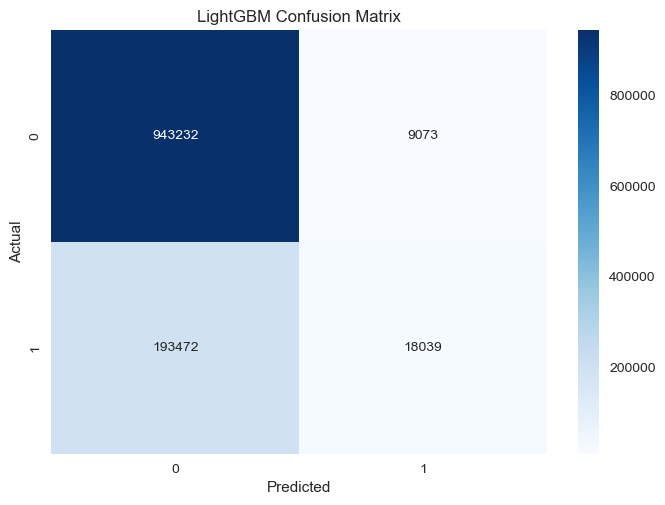

In [126]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- rerun LightGBM with class imbalance scale_POS_Weight
- run logistic regression with class weighting and normalization
- run XGBoost with class imbalance scale_POS_Weight
- check the accuracy. If less, apply hyperparameter tuning to optimize the models
- check for the best fit model
- apply stratified analysis

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18237, number of negative: 81763
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182370 -> initscore=-1.500372
[LightGBM] [Info] Start training from score -1.500372
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=50, n_estimators=200, num_leaves=31; total time=  22.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18238, number of negative: 81762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122498

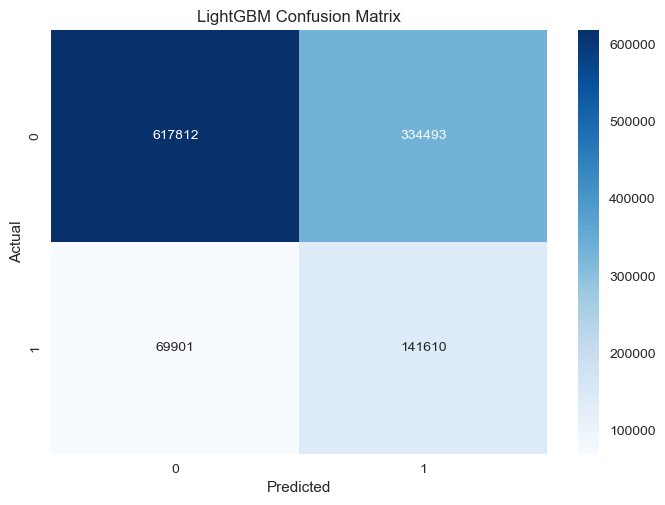

In [128]:
# Train the second model LightGBM classifier (lightgbm) with scale_pos_weight

import lightgbm as lgb

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
lgbm_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=4.5024)
 
lgbm_model.fit(X_train, y_train)
 
y_pred_lgbm = lgbm_model.predict(X_test)
 
 
print("✅ Accuracy:", accuracy_score(y_test, y_pred_lgbm))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

cm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("LightGBM Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

Logistic Regression Performance

✅ Accuracy: 0.5875121153171979

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69    952305
           1       0.25      0.65      0.37    211511

    accuracy                           0.59   1163816
   macro avg       0.57      0.61      0.53   1163816
weighted avg       0.77      0.59      0.63   1163816



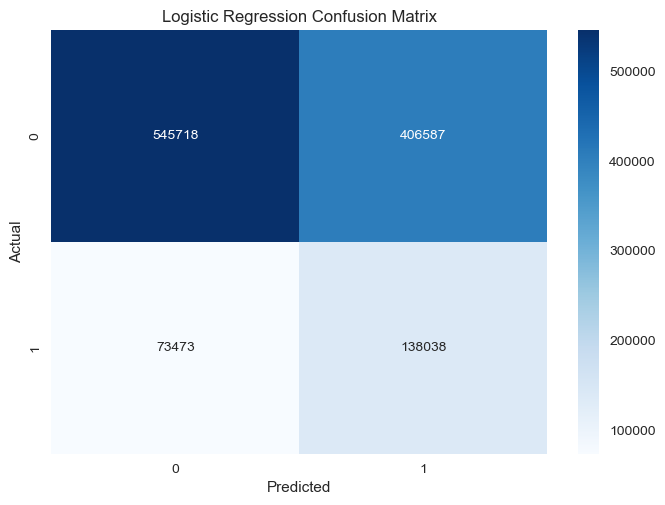

In [132]:
# Train the third model (Logistic Regression)

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Normalize features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)
 
lr_model = LogisticRegression(

    class_weight = 'balanced',

    max_iter = 1000,

    random_state = 42,

    n_jobs = -1

)
 
lr_model.fit(X_train_scaled,y_train)
 
y_pred_rs_lr = lr_model.predict(X_test_scaled)
 
# Evaluation metrics

print('Logistic Regression Performance')

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred_rs_lr))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rs_lr))

cm = confusion_matrix(y_test, y_pred_rs_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Logistic Regression Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

In [ ]:
# Retrain the model by applying hyperparameter tuning to improve accuracy
 
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
 
param_grid = {

    'C': [0.001,0.01,0.1,1,10,100],

    'solver': ['liblinear','saga'],

    'max_iter': [5000]

}
 
lr = LogisticRegression(

    class_weight = 'balanced',

    random_state=42,

    n_jobs=-1

)
 
rs_lr = RandomizedSearchCV(

    lr,

    param_grid,

    n_iter=10,

    cv=3,

    scoring='f1',

    random_state=42,

    n_jobs=-1

)
 
rs_lr.fit(X_train_scaled, y_train)
 
print("Best Params", rs_lr.best_params_)

print("Best F1 Score", rs_lr.best_score_)
 
lr_best = rs_lr.best_estimator_

y_pred_rs_lr = lr_best.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rs_lr))

print("\nClassification Report W tuning:\n", classification_report(y_test, y_pred_rs_lr))

cm = confusion_matrix(y_test, y_pred_rs_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Logistic Regression W tuning Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 